<a href="https://www.kaggle.com/code/joelperezd/poblacion-mundial-eda?scriptVersionId=230880428" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-population-by-countries-2025/Wolrd Population Data.csv


In [2]:
df = pd.read_csv("/kaggle/input/world-population-by-countries-2025/Wolrd Population Data.csv")

In [3]:
df.head()

,Rank,Country,Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,"1,450,935,791",0.89 %,"12,866,195",488,"2,973,190","-630,830",2.0,28,37 %,17.78 %
1,2,China,"1,419,321,278",-0.23 %,"-3,263,655",151,"9,388,211","-318,992",1.0,40,66 %,17.39 %
2,3,United States,"345,426,571",0.57 %,"1,949,236",38,"9,147,420","1,286,132",1.6,38,82 %,4.23 %
3,4,Indonesia,"283,487,931",0.82 %,"2,297,864",156,"1,811,570","-38,469",2.1,30,59 %,3.47 %
4,5,Pakistan,"251,269,164",1.52 %,"3,764,669",326,"770,880","-1,401,173",3.5,20,34 %,3.08 %


In [4]:
df.shape

(234, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               234 non-null    int64  
 1   Country            234 non-null    object 
 2   Population (2024)  234 non-null    object 
 3   Yearly Change      234 non-null    object 
 4   Net Change         234 non-null    object 
 5   Density (P/Km²)    234 non-null    object 
 6   Land Area (Km²)    234 non-null    object 
 7   Migrants (net)     234 non-null    object 
 8   Fert. Rate         234 non-null    float64
 9   Med. Age           234 non-null    int64  
 10  Urban Pop %        234 non-null    object 
 11  World Share        234 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 22.1+ KB


In [6]:
df.shape

(234, 12)

In [7]:
# convertir a int, lista con nombres de las columnas, las recorre, dataset [nombre de la columna] rempleaza la coma por en espacio, tipo int
columnas_a_convertir = [
    'Population (2024)',
    'Net Change',
    'Density (P/Km²)',
    'Land Area (Km²)',
    'Migrants (net)'
]

# Eliminar comas y convertir a números
for col in columnas_a_convertir:
    df[col] = df[col].str.replace(',', '', regex=False).astype(int)

In [8]:
df['World Share'] = df['World Share'].astype(str).str.replace('%','').astype(float)

In [9]:
df['Yearly Change'] = df['Yearly Change'].astype(str).str.replace('%','').astype(float) / 100

In [10]:
#convertimos a los valores que ncesitamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               234 non-null    int64  
 1   Country            234 non-null    object 
 2   Population (2024)  234 non-null    int64  
 3   Yearly Change      234 non-null    float64
 4   Net Change         234 non-null    int64  
 5   Density (P/Km²)    234 non-null    int64  
 6   Land Area (Km²)    234 non-null    int64  
 7   Migrants (net)     234 non-null    int64  
 8   Fert. Rate         234 non-null    float64
 9   Med. Age           234 non-null    int64  
 10  Urban Pop %        234 non-null    object 
 11  World Share        234 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 22.1+ KB


In [11]:
df.duplicated().sum() # revisamos si tiene duplicados 

0

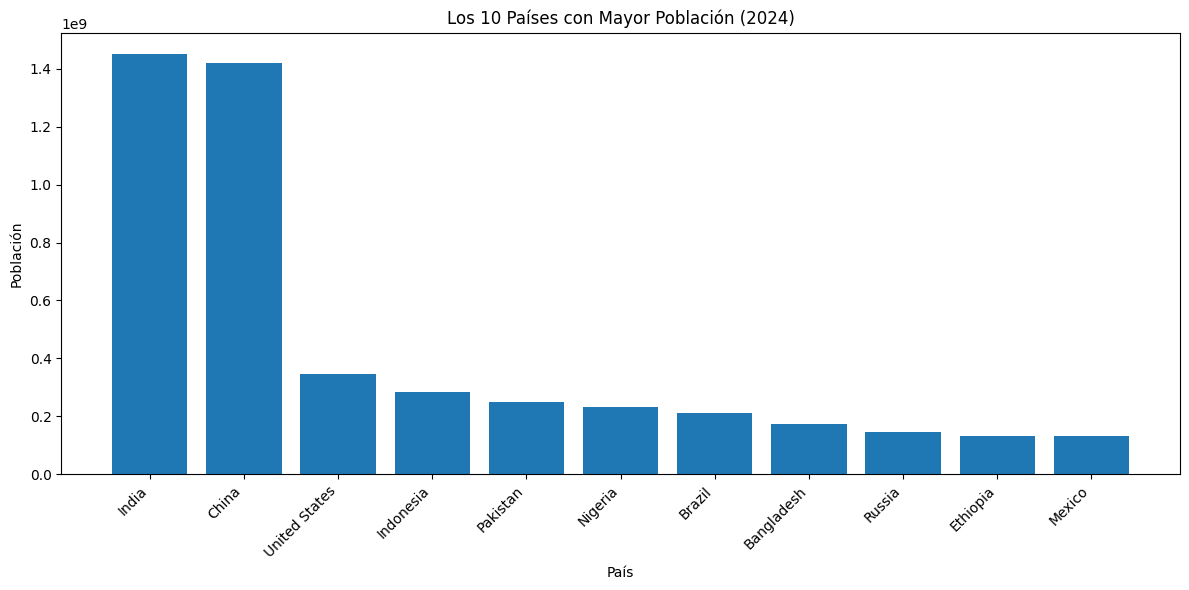

In [12]:
import matplotlib.pyplot as plt
top10 = df.nlargest(11, 'Population (2024)')
plt.figure(figsize=(12,6))
plt.bar(top10['Country'], top10['Population (2024)']) #x pais, y poblacion 
plt.title('Los 10 Países con Mayor Población (2024)')
plt.xlabel('País')
plt.ylabel('Población')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres de los países para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que los elementos se superpongan
plt.show()

In [13]:
# identificar valores nana 
nan = df.isnull().sum()
nan

Rank                 0
Country              0
Population (2024)    0
Yearly Change        0
Net Change           0
Density (P/Km²)      0
Land Area (Km²)      0
Migrants (net)       0
Fert. Rate           0
Med. Age             0
Urban Pop %          0
World Share          0
dtype: int64

In [14]:
# No hay valores faltantes 

In [15]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
229    False
230    False
231    False
232    False
233    False
Length: 234, dtype: bool

       Fert. Rate    Med. Age
count  234.000000  234.000000
mean     2.332051   31.679487
std      1.163002    9.810427
min      0.700000   14.000000
25%      1.500000   23.000000
50%      2.000000   32.500000
75%      2.975000   40.000000
max      6.000000   59.000000


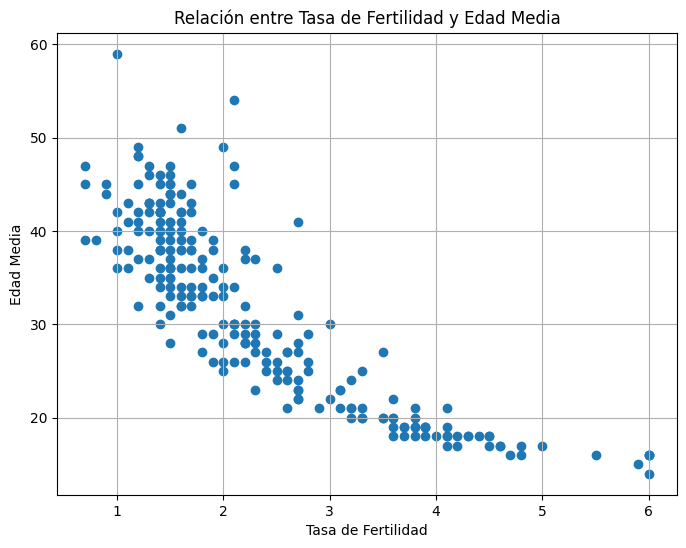

In [16]:
#exploramos relaciones entre variables,  
print(df[['Fert. Rate', 'Med. Age']].describe())
plt.figure(figsize=(8, 6)) # Tamano de la fifura 
plt.scatter(df['Fert. Rate'], df['Med. Age'])
plt.title('Relación entre Tasa de Fertilidad y Edad Media')
plt.xlabel('Tasa de Fertilidad')
plt.ylabel('Edad Media')
plt.grid(True)
plt.show()

se puede concluir que los paises con la tasa de fertilidad alta estan mas envejecidos 

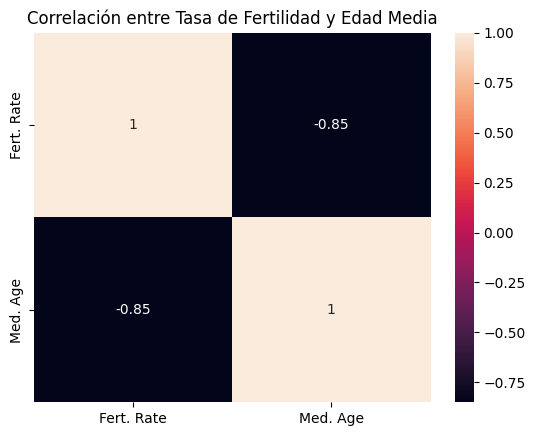

In [17]:
# Usando seaborn 
import seaborn as sns
correlation = df[['Fert. Rate', 'Med. Age']].corr()
sns.heatmap(correlation, annot=True)
plt.title('Correlación entre Tasa de Fertilidad y Edad Media')
plt.show()


Analizar la correlacion, observamos que la relacion es negativa alta, por lo que se puede conlcuir que entre mayor la edad de la poblacon, se tiene una fertilidad baj

In [18]:
correlation = df['Fert. Rate'].corr(df['Med. Age'])
print(f"Correlación de Pearson: {correlation}")

Correlación de Pearson: -0.8496372961576968


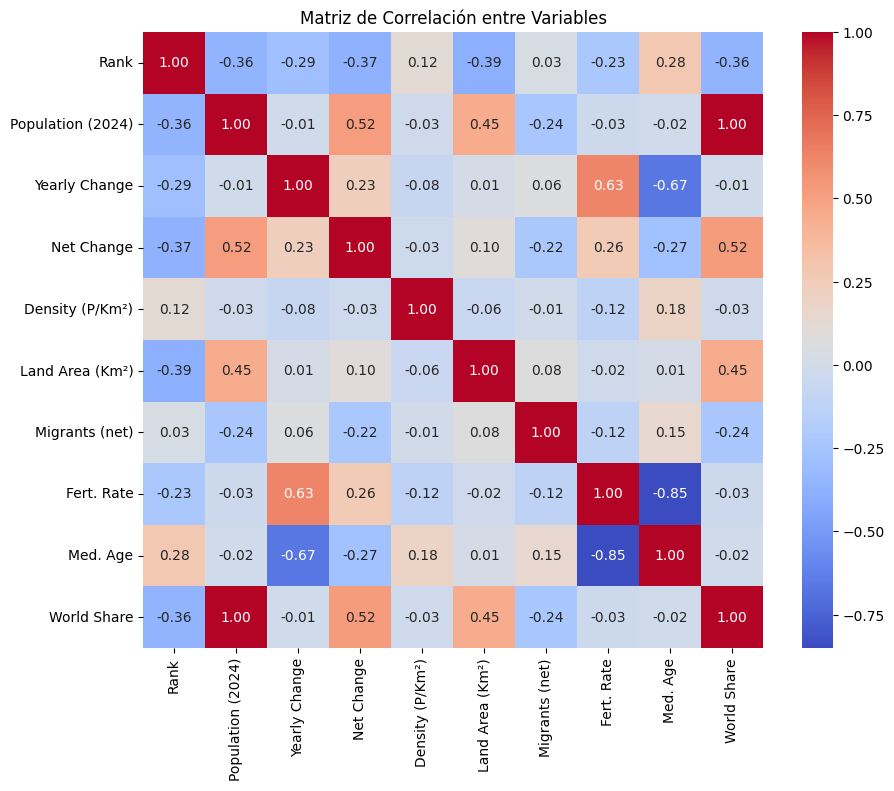

In [19]:
# calcular la correlacion entre otras variables 
# Eliminar columnas no numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables')
plt.show()

Vemos como hay relacion entre mas de una variabke, por ejemplo world share y poblacion tienen un alto nivel de correlacion por lo que podriamos eliminar world share para evitar la redundancia en un modelo de ML 

In [20]:
correlation_matrix 

,Rank,Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,World Share
Rank,1.000000,-0.362005,-0.287952,-0.368506,0.124527,-0.392084,0.029181,-0.226990,0.279522,-0.362099
Population (2024),-0.362005,1.000000,-0.011954,0.523137,-0.025541,0.449786,-0.237466,-0.034340,-0.015963,0.999999
Yearly Change,-0.287952,-0.011954,1.000000,0.231786,-0.076171,0.010268,0.063031,0.628564,-0.665817,-0.011866
Net Change,-0.368506,0.523137,0.231786,1.000000,-0.029962,0.097684,-0.224971,0.259889,-0.273917,0.523207
Density (P/Km²),0.124527,-0.025541,-0.076171,-0.029962,1.000000,-0.058298,-0.011282,-0.123338,0.184173,-0.025518
Land Area (Km²),-0.392084,0.449786,0.010268,0.097684,-0.058298,1.000000,0.081904,-0.021409,0.014046,0.449721
Migrants (net),0.029181,-0.237466,0.063031,-0.224971,-0.011282,0.081904,1.000000,-0.121995,0.152957,-0.237517
Fert. Rate,-0.226990,-0.034340,0.628564,0.259889,-0.123338,-0.021409,-0.121995,1.000000,-0.849637,-0.034362
Med. Age,0.279522,-0.015963,-0.665817,-0.273917,0.184173,0.014046,0.152957,-0.849637,1.000000,-0.016002
World Share,-0.362099,0.999999,-0.011866,0.523207,-0.025518,0.449721,-0.237517,-0.034362,-0.016002,1.000000


In [21]:
paises_densamente_poblados = df.sort_values(by='Density (P/Km²)', ascending=False)
paises_densamente_poblados

,Rank,Country,Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
215,216,Monaco,38631,-0.0083,-325,25927,1,110,2.1,54,N.A.,0.00
166,167,Macao,720262,0.0089,6350,24009,30,1620,0.7,39,96 %,0.01
114,115,Singapore,5832387,0.0075,43297,8332,700,20011,1.0,36,N.A.,0.07
104,105,Hong Kong,7414909,-0.0037,-27825,7062,1050,-19272,0.7,47,N.A.,0.09
214,215,Gibraltar,39329,0.0223,858,3933,10,598,1.9,39,90 %,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
54,55,Australia,26713205,0.0099,262081,3,7682300,138510,1.6,38,86 %,0.33
170,171,Western Sahara,590506,0.0186,10777,2,266000,5358,2.2,32,97 %,0.01
132,133,Mongolia,3475540,0.0127,43608,2,1553560,83,2.6,27,67 %,0.04
205,206,Greenland,55840,-0.0015,-82,0,410450,-284,1.9,35,90 %,0.00


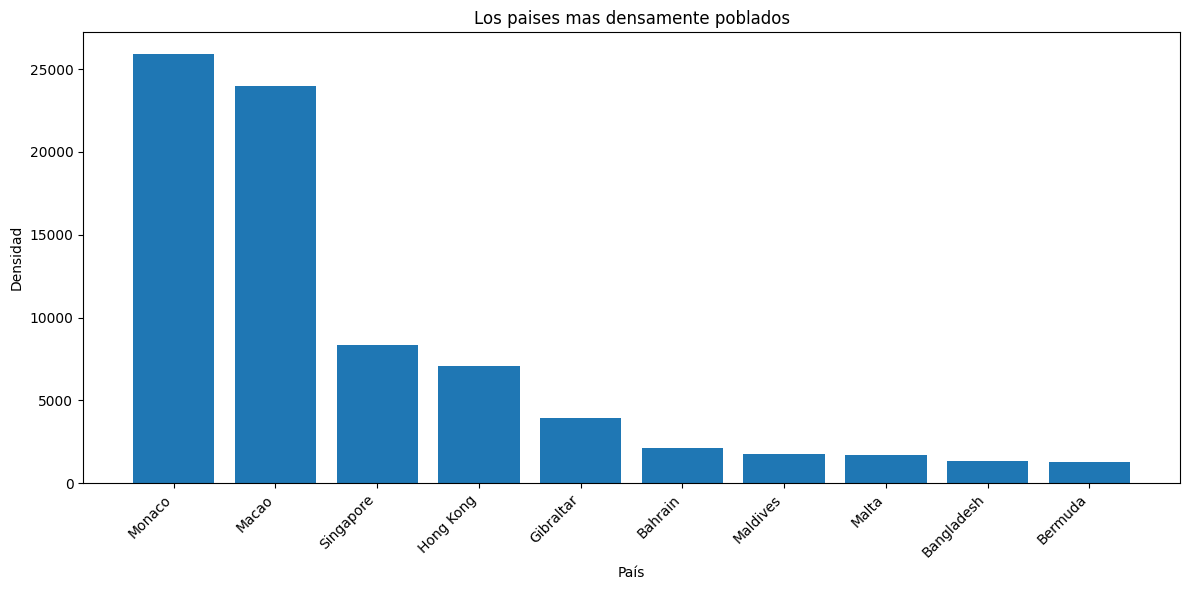

In [22]:

top10 = df.nlargest(10, 'Density (P/Km²)')
plt.figure(figsize=(12,6))
plt.bar(top10['Country'], top10['Density (P/Km²)']) #x pais, y poblacion 
plt.title('Los paises mas densamente poblados')
plt.xlabel('País')
plt.ylabel('Densidad')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres de los países para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que los elementos se superpongan
plt.show()

In [23]:
# Eliminar variables redundantes de acuerdo a la correlacion 
umbral = 0.7
correlation_matrix = numeric_df.corr().abs() # obtenemos el valor absoluto 
columnas = correlation_matrix.columns 
var = set()
for i in range (len(columnas)): # Recorre las filas
    for j in range(i): # recorre las columnas 
        if correlation_matrix.iloc[i,j]>umbral:  # si el valor de la fila columa es mayor al umral agregalo
             nombre_columna = correlation_matrix.columns[i] 
             var.add(nombre_columna) # agrega al set vacio 
df_sin_redundancia = df.drop(var, axis=1) # Elimina la columna

In [24]:
df_sin_redundancia

,Rank,Country,Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Urban Pop %
0,1,India,1450935791,0.0089,12866195,488,2973190,-630830,2.0,37 %
1,2,China,1419321278,-0.0023,-3263655,151,9388211,-318992,1.0,66 %
2,3,United States,345426571,0.0057,1949236,38,9147420,1286132,1.6,82 %
3,4,Indonesia,283487931,0.0082,2297864,156,1811570,-38469,2.1,59 %
4,5,Pakistan,251269164,0.0152,3764669,326,770880,-1401173,3.5,34 %
...,...,...,...,...,...,...,...,...,...,...
229,230,Montserrat,4389,-0.0070,-31,44,100,-7,1.4,11 %
230,231,Falkland Islands,3470,-0.0020,-7,0,12170,-13,1.7,68 %
231,232,Tokelau,2506,0.0455,109,251,10,72,2.6,0 %
232,233,Niue,1819,0.0011,2,7,260,10,2.5,44 %


In [25]:
df_sin_redundancia.shape

(234, 10)

Metodo sencillo de eliminar columnas que tienen correlacion alta, este dataset ya se encontraba sin valores duplicaods o valores nulos por lo que no hay problema en empezar a implementar un modelo de ML 